/Users/siyuanqiu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/siyuanqiu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


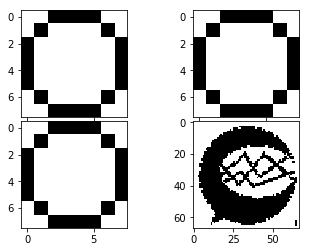

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3])
            balanceAr.append(avgNum)
    balance = reduce(lambda x, y: x + y, balanceAr) / len(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr

i = Image.open('images/numbers/0.1.png')
iar = np.array(i)
i2 = Image.open('images/numbers/y0.4.png')
iar2 = np.array(i2)
i3 = Image.open('images/numbers/y0.5.png')
iar3 = np.array(i3)
i4 = Image.open('images/sentdex.png')
iar4 = np.array(i4)


iar = threshold(iar)
iar2 = threshold(iar2)
iar3 = threshold(iar3)
iar4 = threshold(iar4)

fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8,6),(4,0), rowspan=4, colspan=3)
ax3 = plt.subplot2grid((8,6),(0,3), rowspan=4, colspan=3)
ax4 = plt.subplot2grid((8,6),(4,3), rowspan=4, colspan=3)

ax1.imshow(iar)
ax2.imshow(iar2)
ax3.imshow(iar3)
ax4.imshow(iar4)


plt.show()



In [13]:
def createExamples():
    numberArrayExamples = open('numArEx.txt','a')
    numbersWeHave = range(1,10)
    for eachNum in numbersWeHave:
        #print eachNum
        for furtherNum in numbersWeHave:
            # you could also literally add it *.1 and have it create
            # an actual float, but, since in the end we are going
            # to use it as a string, this way will work.
            print(str(eachNum)+'.'+str(furtherNum))
            imgFilePath = 'images/numbers/'+str(eachNum)+'.'+str(furtherNum)+'.png'
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiarl = str(eiar.tolist())

            print(eiarl)
            lineToWrite = str(eachNum)+'::'+eiarl+'\n'
            numberArrayExamples.write(lineToWrite)
createExamples()

1.1
[[[255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]], [[255, 255, 255], [255, 255, 255], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]], [[255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]], [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]], [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]], [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]], [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [0, 0, 0], [255, 255, 255], [255, 255, 255], [255, 255, 255]], [[255, 255, 255], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [255, 255, 

list index out of range
Counter({8: 493, 6: 460, 9: 454, 5: 445, 3: 443, 2: 375, 4: 355, 7: 340, 1: 303})


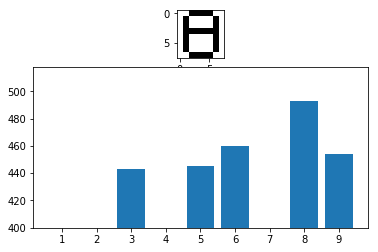

In [18]:
def whatNumIsThis(filePath):

    matchedAr = []
    loadExamps = open('numArEx.txt','r').read()
    loadExamps = loadExamps.split('\n')
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()
    inQuestion = str(iarl)
    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split('::')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')
            x = 0
            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))

                x+=1
        except Exception as e:
            print(str(e))
                
    x = Counter(matchedAr)
    print(x)
    graphX = []
    graphY = []

    ylimi = 0

    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])
        ylimi = x[eachThing]



    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    plt.ylim(400)
    
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)

    plt.show()

whatNumIsThis('images/numbers/8.9.png')
